In [ ]:
"""
!pip install Pillow
"""

In [ ]:
"""
!pip install importnb
import importnb
with __import__('importnb').Notebook():
    from Observe_HessianMatrix import Observe_HessianMatrix
"""

In [ ]:
"""
Cording Plan



Purpose1
固有vector可視化: ndarray [-1, 1]
1step拡散の画像可視化: tensor [-1, 1]




"""

In [2]:
%cd /content/drive/MyDrive/local_repo_all/Research_repo

/content/drive/MyDrive/local_repo_all/Research_repo


In [3]:
"""moduleのパス追加"""
import sys
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my-submodule')
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my_modules')

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import torch
import torchvision

In [ ]:
""" tensor -> PIL image """

In [ ]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt'
img_tensor = torch.squeeze(torch.load(tensor_path))


In [ ]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/perx/plural_per100.pth'
img_ten = torch.load(tensor_path, map_location=torch.device('cpu'))
img_tensor = img_ten[0]

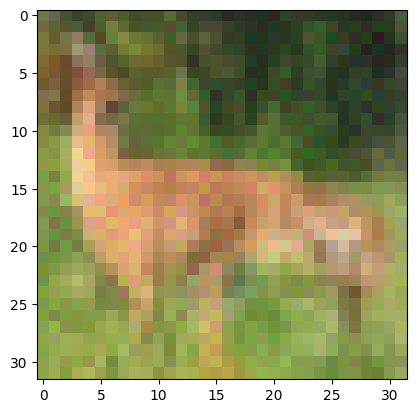

In [ ]:
img_pil = torchvision.transforms.functional.to_pil_image(img_tensor)
img_pil.size
plt.imshow(np.array(img_pil))

In [ ]:
"""
x = torch.load('/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt')
x = torch.reshape(torch.flatten(x), (-1, 1)).to('cpu').detach().numpy().copy()
"""

In [5]:
B = np.load('/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/Bnew_all/B_100_9.npy')

In [6]:
values, vectors = np.linalg.eig(B)

In [8]:
np.set_printoptions(precision=2, suppress=True)

In [7]:
print(f'{values.shape=}')
print(f'{vectors.shape=}')
print(f'{B.shape=}')

values.shape=(3072,)
vectors.shape=(3072, 3072)
B.shape=(3072, 3072)


In [9]:
# 固有値を昇順でソートし、その順序に合わせて固有ベクトルもソート
sorted_indices = np.argsort(values)
sorted_eigenvalues = values[sorted_indices]
sorted_eigenvectors = vectors[:, sorted_indices]

In [10]:
sorted_eigenvalues

array([-5091.56, -3694.33, -3572.4 , ...,   597.01,  1322.05,  2854.84])

In [ ]:
# 正規化
def normalize_vector(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

In [ ]:
img_eigvec = normalize_vector(sorted_eigenvectors)
print(f'{np.linalg.norm(sorted_eigenvectors)=}')

np.linalg.norm(sorted_eigenvectors)=55.42562584220403


In [ ]:
# img = sorted_eigenvectors[:, 0]
img_eigvec0 = img_eigvec[:, 0]
img_eigvec255 = img_eigvec[:, 255]


In [17]:
print(f'{sorted_eigenvectors[:, 0].mean()=:.3f}')
print(f'{sorted_eigenvectors[:, 0].std()=:.3f}')

sorted_eigenvectors[:, 0].mean()=-0.000
sorted_eigenvectors[:, 0].std()=0.018


In [14]:
for i in range(100):
  for j in range(100):
    print(f'{sorted_eigenvectors[j, i]=}')

sorted_eigenvectors[j, i]=-0.0024162482738626883
sorted_eigenvectors[j, i]=0.0069621765634252835
sorted_eigenvectors[j, i]=-0.0057239498604556155
sorted_eigenvectors[j, i]=-0.01680767833791077
sorted_eigenvectors[j, i]=0.01117521387537342
sorted_eigenvectors[j, i]=-0.01726751413869806
sorted_eigenvectors[j, i]=-0.002111417207549581
sorted_eigenvectors[j, i]=0.019820025270524445
sorted_eigenvectors[j, i]=0.005888923070323162
sorted_eigenvectors[j, i]=0.007637172087744386
sorted_eigenvectors[j, i]=-0.0016433537829033083
sorted_eigenvectors[j, i]=-0.007812058804576609
sorted_eigenvectors[j, i]=-0.01360919961815524
sorted_eigenvectors[j, i]=0.031357820704112964
sorted_eigenvectors[j, i]=-0.016873058412611597
sorted_eigenvectors[j, i]=-0.014853854900164463
sorted_eigenvectors[j, i]=0.024628024833599438
sorted_eigenvectors[j, i]=-0.030238420077772422
sorted_eigenvectors[j, i]=0.034760025733379864
sorted_eigenvectors[j, i]=-0.012606330601004866
sorted_eigenvectors[j, i]=0.009237704842129348
s

In [ ]:
print(f'{img_eigvec0=}\n{img_eigvec255=}')

img_eigvec0=array([-0., -0., -0., ..., -0.,  0.,  0.])
img_eigvec255=array([-0., -0., -0., ..., -0.,  0.,  0.])


In [ ]:
for i in range(255):
  print(f'{img_eigvec[:, i].max()=}')


img_eigvec[:, i].max()=0.0012880259185489764
img_eigvec[:, i].max()=0.001095362948945101
img_eigvec[:, i].max()=0.001121545693439314
img_eigvec[:, i].max()=0.0011402298671693793
img_eigvec[:, i].max()=0.0011259239868105747
img_eigvec[:, i].max()=0.0012076736916116545
img_eigvec[:, i].max()=0.0012370052238709637
img_eigvec[:, i].max()=0.0012740144798202835
img_eigvec[:, i].max()=0.0013945936759123842
img_eigvec[:, i].max()=0.0011777702261245035
img_eigvec[:, i].max()=0.0010472014329064073
img_eigvec[:, i].max()=0.0015865009441574478
img_eigvec[:, i].max()=0.001154911185067385
img_eigvec[:, i].max()=0.001162790410185868
img_eigvec[:, i].max()=0.0043080492721588705
img_eigvec[:, i].max()=0.002533463226468946
img_eigvec[:, i].max()=0.00286816253181823
img_eigvec[:, i].max()=0.0028044160125131026
img_eigvec[:, i].max()=0.003068472280854551
img_eigvec[:, i].max()=0.0033614524569284625
img_eigvec[:, i].max()=0.0034305732427539555
img_eigvec[:, i].max()=0.0022669400986965226
img_eigvec[:, i].m

In [ ]:
img = img_eigvec0
# numpy -> PIL image
n = np.reshape(img, [3, 32, 32])
print(n.shape)
# [C, H, W]から[H, W, C]に順序を変更
p = np.transpose(n, (1, 2, 0))
# 値の範囲を[-1, 1] から[0, 255] にスケーリング
img = (((p+1)/2) * 255).astype(np.uint8)
# PIL Imageに変換
pil_img = Image.fromarray(img)

(3, 32, 32)


In [ ]:
print(img)

[[[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 ...

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]]


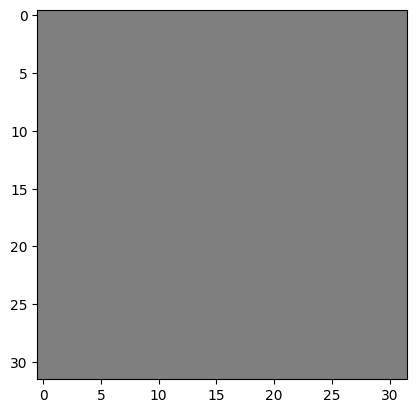

In [ ]:
plt.imshow(pil_img)